In [1]:
import pandas as pd
from etna.datasets import TSDataset
from etna.transforms import LagTransform
from etna.models import CatBoostMultiSegmentModel
from etna.pipeline import Pipeline
from etna.models import LinearPerSegmentModel
from etna.metrics import SMAPE, MAPE

c:\Users\Xiaomi Air 13\Desktop\Диплом Арина\mlvenv\lib\site-packages\etna\settings.py:37: UserWarning: etna[torch] is not available, to install it, run `pip install etna[torch]`
  warnings.warn("etna[torch] is not available, to install it, run `pip install etna[torch]`")
c:\Users\Xiaomi Air 13\Desktop\Диплом Арина\mlvenv\lib\site-packages\etna\settings.py:45: UserWarning: wandb is not available, to install it, run `pip install etna[wandb]`
  warnings.warn("wandb is not available, to install it, run `pip install etna[wandb]`")
c:\Users\Xiaomi Air 13\Desktop\Диплом Арина\mlvenv\lib\site-packages\etna\settings.py:53: UserWarning: etna[prophet] is not available, to install it, run `pip install etna[prophet]`
  warnings.warn("etna[prophet] is not available, to install it, run `pip install etna[prophet]`")
c:\Users\Xiaomi Air 13\Desktop\Диплом Арина\mlvenv\lib\site-packages\etna\settings.py:62: UserWarning: etna[classification] is not available, to install it, run `pip install etna[classific

In [2]:
data = pd.read_csv('../data/processed/msk_segment.csv', index_col=0)
data.head()

segment      target    data
0  k=3_t=11_r=1   4704280.0  2018-3
1   k=4_t=1_r=2   8000000.0  2018-3
2  k=16_t=1_r=1  11500000.0  2018-4
3   k=6_t=1_r=3  11500000.0  2018-4
4   k=8_t=1_r=2  10200000.0  2018-4

In [3]:
def rename_field(df : pd.DataFrame):
    df['timestamp'] = pd.to_datetime(df['data'])
    df.drop('data', axis=1, inplace=True)
    return df

In [4]:
data = rename_field(data.copy())

In [5]:
data_etna = TSDataset.to_dataset(data)
data_etna.head(5)

segment    k=0_t=11_r=1 k=0_t=11_r=2 k=0_t=11_r=3 k=0_t=11_r=4 k=0_t=1_r=1  \
feature          target       target       target       target      target   
timestamp                                                                    
2018-03-01          NaN          NaN          NaN          NaN         NaN   
2018-04-01          NaN          NaN          NaN          NaN         NaN   
2018-05-01          NaN          NaN          NaN          NaN         NaN   
2018-06-01          NaN          NaN          NaN          NaN         NaN   
2018-07-01          NaN          NaN          NaN          NaN         NaN   

segment    k=0_t=1_r=2 k=0_t=1_r=3 k=0_t=1_r=4 k=10_t=11_r=1 k=10_t=11_r=2  \
feature         target      target      target        target        target   
timestamp                                                                    
2018-03-01         NaN         NaN         NaN           NaN           NaN   
2018-04-01         NaN         NaN         NaN           NaN           NaN   
2018-05-01         NaN         NaN         NaN           NaN           NaN   
2018-06-01         NaN         NaN         NaN           NaN           NaN   
2018-07-01         NaN         NaN         NaN           NaN           NaN   

segment     ... k=8_t=1_r=3 k=8_t=1_r=4 k=9_t=11_r=1 k=9_t=11_r=2  \
feature     ...      target      target       target       target   
timestamp   ...                                                     
2018-03-01  ...         NaN         NaN          NaN          NaN   
2018-04-01  ...         NaN         NaN          NaN          NaN   
2018-05-01  ...  12000000.0         NaN          NaN          NaN   
2018-06-01  ...         NaN         NaN          NaN          NaN   
2018-07-01  ...         NaN         NaN          NaN          NaN   

segment    k=9_t=11_r=3 k=9_t=11_r=4 k=9_t=1_r=1 k=9_t=1_r=2 k=9_t=1_r=3  \
feature          target       target      target      target      target   
timestamp                                                                  
2018-03-01          NaN          NaN         NaN         NaN         NaN   
2018-04-01          NaN          NaN         NaN         NaN         NaN   
2018-05-01          NaN          NaN         NaN         NaN         NaN   
2018-06-01          NaN          NaN         NaN         NaN         NaN   
2018-07-01          NaN          NaN         NaN         NaN         NaN   

segment    k=9_t=1_r=4  
feature         target  
timestamp               
2018-03-01         NaN  
2018-04-01         NaN  
2018-05-01         NaN  
2018-06-01         NaN  
2018-07-01         NaN  

[5 rows x 160 columns]

In [6]:
ts = TSDataset(data_etna, freq="MS")

In [7]:
ts.head()

segment    k=0_t=11_r=1 k=0_t=11_r=2 k=0_t=11_r=3 k=0_t=11_r=4 k=0_t=1_r=1  \
feature          target       target       target       target      target   
timestamp                                                                    
2018-03-01          NaN          NaN          NaN          NaN         NaN   
2018-04-01          NaN          NaN          NaN          NaN         NaN   
2018-05-01          NaN          NaN          NaN          NaN         NaN   
2018-06-01          NaN          NaN          NaN          NaN         NaN   
2018-07-01          NaN          NaN          NaN          NaN         NaN   

segment    k=0_t=1_r=2 k=0_t=1_r=3 k=0_t=1_r=4 k=10_t=11_r=1 k=10_t=11_r=2  \
feature         target      target      target        target        target   
timestamp                                                                    
2018-03-01         NaN         NaN         NaN           NaN           NaN   
2018-04-01         NaN         NaN         NaN           NaN           NaN   
2018-05-01         NaN         NaN         NaN           NaN           NaN   
2018-06-01         NaN         NaN         NaN           NaN           NaN   
2018-07-01         NaN         NaN         NaN           NaN           NaN   

segment     ... k=8_t=1_r=3 k=8_t=1_r=4 k=9_t=11_r=1 k=9_t=11_r=2  \
feature     ...      target      target       target       target   
timestamp   ...                                                     
2018-03-01  ...         NaN         NaN          NaN          NaN   
2018-04-01  ...         NaN         NaN          NaN          NaN   
2018-05-01  ...  12000000.0         NaN          NaN          NaN   
2018-06-01  ...         NaN         NaN          NaN          NaN   
2018-07-01  ...         NaN         NaN          NaN          NaN   

segment    k=9_t=11_r=3 k=9_t=11_r=4 k=9_t=1_r=1 k=9_t=1_r=2 k=9_t=1_r=3  \
feature          target       target      target      target      target   
timestamp                                                                  
2018-03-01          NaN          NaN         NaN         NaN         NaN   
2018-04-01          NaN          NaN         NaN         NaN         NaN   
2018-05-01          NaN          NaN         NaN         NaN         NaN   
2018-06-01          NaN          NaN         NaN         NaN         NaN   
2018-07-01          NaN          NaN         NaN         NaN         NaN   

segment    k=9_t=1_r=4  
feature         target  
timestamp               
2018-03-01         NaN  
2018-04-01         NaN  
2018-05-01         NaN  
2018-06-01         NaN  
2018-07-01         NaN  

[5 rows x 160 columns]

In [8]:
df = ts.to_pandas()

In [9]:
df = df["2018-09-01":]

In [10]:
df.interpolate(inplace=True)

In [11]:
ts = TSDataset(df, freq="MS")

In [12]:
ts

segment     k=0_t=11_r=1  k=0_t=11_r=2  k=0_t=11_r=3  k=0_t=11_r=4  \
feature           target        target        target        target   
timestamp                                                            
2018-09-01  6.534017e+06  8.787295e+06  1.170129e+07  1.632508e+07   
2018-10-01  6.268993e+06  8.695338e+06  1.183369e+07  1.773784e+07   
2018-11-01  6.385188e+06  8.609075e+06  1.226717e+07  1.915060e+07   
2018-12-01  6.180563e+06  9.427718e+06  1.284547e+07  1.484982e+07   
2019-01-01  6.252798e+06  8.948278e+06  1.291373e+07  1.536237e+07   
2019-02-01  6.741962e+06  9.299497e+06  1.315371e+07  1.587491e+07   
2019-03-01  6.298725e+06  9.708034e+06  1.364256e+07  1.638746e+07   
2019-04-01  6.827157e+06  9.384003e+06  1.368238e+07  1.690000e+07   
2019-05-01  6.772141e+06  9.537185e+06  1.299633e+07  1.620000e+07   
2019-06-01  6.695771e+06  9.582778e+06  1.272184e+07  1.550000e+07   
2019-07-01  6.751274e+06  9.629366e+06  1.294724e+07  1.581132e+07   
2019-08-01  5.905855e+06  9.335669e+06  1.360501e+07  1.612264e+07   
2019-09-01  6.426260e+06  9.761773e+06  1.291097e+07  1.643396e+07   
2019-10-01  6.456491e+06  9.527994e+06  1.325397e+07  1.674528e+07   
2019-11-01  7.032872e+06  9.967478e+06  1.452318e+07  1.705660e+07   
2019-12-01  6.096766e+06  1.000723e+07  1.295685e+07  1.568773e+07   
2020-01-01  7.241250e+06  1.552667e+07  1.422967e+07  1.431887e+07   
2020-02-01  7.520000e+06  1.218250e+07  1.220000e+07  1.295000e+07   
2020-03-01  6.268776e+06  1.012204e+07  1.327325e+07  1.384900e+07   
2020-04-01  6.431723e+06  1.020918e+07  1.576543e+07  1.474800e+07   
2020-05-01  7.374106e+06  1.049650e+07  1.350429e+07  1.564700e+07   
2020-06-01  7.890109e+06  9.725568e+06  1.349944e+07  1.654600e+07   
2020-07-01  7.974121e+06  1.043736e+07  1.375571e+07  1.744500e+07   
2020-08-01  8.157896e+06  1.037713e+07  1.420491e+07  1.834400e+07   
2020-09-01  7.998684e+06  1.065795e+07  1.358370e+07  1.924300e+07   
2020-10-01  8.219164e+06  1.076141e+07  1.459971e+07  2.014200e+07   
2020-11-01  8.990732e+06  1.117458e+07  1.469926e+07  2.104100e+07   
2020-12-01  8.976921e+06  1.172950e+07  1.593728e+07  2.194000e+07   
2021-01-01  8.922337e+06  1.113128e+07  1.525222e+07  2.194000e+07   
2021-02-01  9.608128e+06  1.266441e+07  1.715487e+07  2.194000e+07   
2021-03-01  9.679242e+06  1.267182e+07  1.683668e+07  2.241200e+07   
2021-04-01  1.003675e+07  1.293518e+07  1.677098e+07  2.430000e+07   
2021-05-01  1.028189e+07  1.333712e+07  1.661952e+07  2.430000e+07   

segment      k=0_t=1_r=1   k=0_t=1_r=2   k=0_t=1_r=3   k=0_t=1_r=4  \
feature           target        target        target        target   
timestamp                                                            
2018-09-01  5.962967e+06  8.508990e+06  1.050855e+07  1.184000e+07   
2018-10-01  5.918891e+06  8.674125e+06  1.039006e+07  1.226424e+07   
2018-11-01  6.136471e+06  8.653709e+06  1.081820e+07  1.237333e+07   
2018-12-01  6.113462e+06  8.610884e+06  1.095133e+07  1.343353e+07   
2019-01-01  6.359542e+06  8.648575e+06  1.114258e+07  1.428846e+07   
2019-02-01  6.835201e+06  9.356906e+06  1.108596e+07  1.261167e+07   
2019-03-01  7.061646e+06  9.531342e+06  1.117256e+07  1.575300e+07   
2019-04-01  6.964211e+06  9.166020e+06  1.166448e+07  1.183222e+07   
2019-05-01  6.920354e+06  8.920859e+06  1.084507e+07  1.138333e+07   
2019-06-01  6.671832e+06  9.159209e+06  1.135668e+07  1.460000e+07   
2019-07-01  7.036430e+06  9.288320e+06  1.130833e+07  1.378958e+07   
2019-08-01  6.909742e+06  9.307538e+06  1.189527e+07  1.341500e+07   
2019-09-01  7.078072e+06  9.158692e+06  1.188905e+07  1.292273e+07   
2019-10-01  6.686689e+06  9.290634e+06  1.169029e+07  1.282300e+07   
2019-11-01  6.913380e+06  9.408285e+06  1.164308e+07  1.450750e+07   
2019-12-01  6.847925e+06  9.579437e+06  1.215079e+07  1.680143e+07   
2020-01-01  7.066065e+06  9.553104e+06  1.181880e+07  1.142112e+07   
2020-02-01  7.030876e+06  9.515112e+06  1.123519e+07  1.485000e+07   
2020-03-0

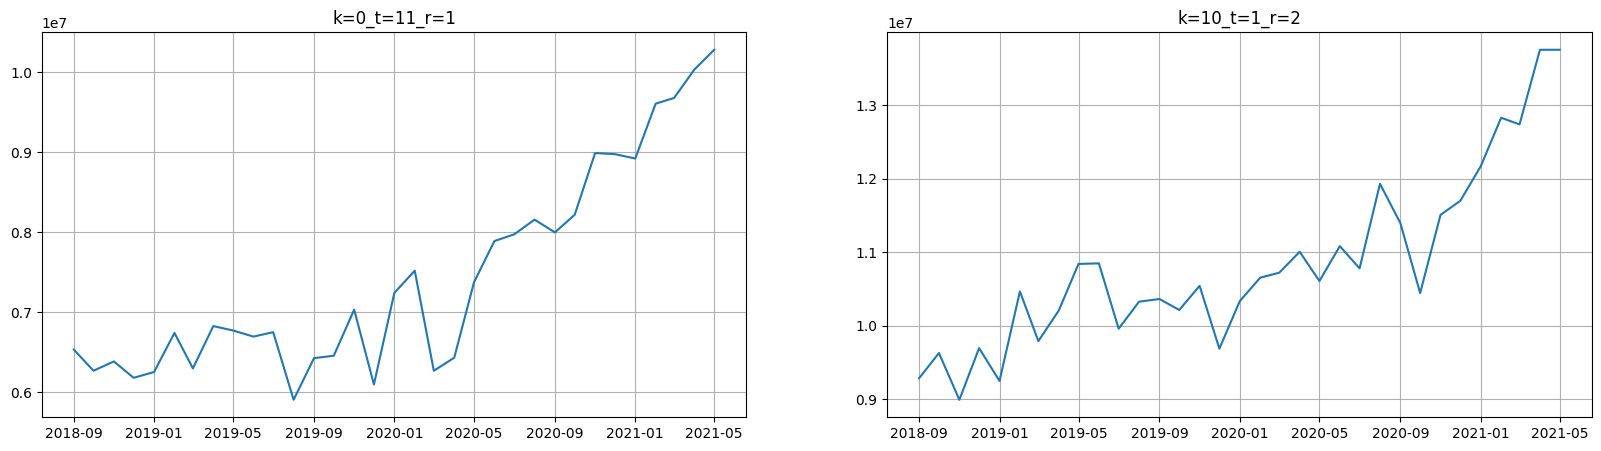

In [13]:
ts.plot(segments=("k=0_t=11_r=1", "k=10_t=1_r=2"))

In [14]:
from etna.transforms import StandardScalerTransform


In [27]:
train_ts, test_ts = ts.train_test_split(
    train_start="2018-09-01",
    train_end="2020-7-01",
    test_start="2020-8-01",
    test_end="2020-12-01",
)

In [28]:
from etna.transforms import LagTransform, LogTransform
HORIZON = 5
lags = LagTransform(in_column="target", lags=[5])
#log = LogTransform(in_column="target")
transforms = [ lags]
train_ts.fit_transform(transforms)

In [29]:
from etna.models import CatBoostMultiSegmentModel
from etna.models import CatBoostPerSegmentModel
HORIZON = 5
model =  CatBoostMultiSegmentModel()
model.fit(train_ts)
future_ts = train_ts.make_future(future_steps=HORIZON, transforms=transforms)
forecast_ts = model.forecast(future_ts)
forecast_ts.inverse_transform(transforms)

In [30]:
from etna.metrics import SMAPE

smape = MAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'k=0_t=11_r=1': 9.570577290884032,
 'k=0_t=11_r=2': 5.898540937927557,
 'k=0_t=11_r=3': 9.048364283299586,
 'k=0_t=11_r=4': 20.486022050266108,
 'k=0_t=1_r=1': 5.56940286912573,
 'k=0_t=1_r=2': 8.232398413991216,
 'k=0_t=1_r=3': 6.107318167524704,
 'k=0_t=1_r=4': 16.840130745403606,
 'k=10_t=11_r=1': 16.92073436798455,
 'k=10_t=11_r=2': 8.934749929375506,
 'k=10_t=11_r=3': 13.078306862628375,
 'k=10_t=11_r=4': 20.564803643056344,
 'k=10_t=1_r=1': 4.631896773346308,
 'k=10_t=1_r=2': 5.942634957457867,
 'k=10_t=1_r=3': 8.464022117247467,
 'k=10_t=1_r=4': 6.671781738268826,
 'k=11_t=11_r=1': 9.834738285781672,
 'k=11_t=11_r=2': 8.524215505372478,
 'k=11_t=11_r=3': 5.67718189148325,
 'k=11_t=11_r=4': 25.462440141236254,
 'k=11_t=1_r=1': 6.890654157113434,
 'k=11_t=1_r=2': 7.131783779277219,
 'k=11_t=1_r=3': 6.0214585014671345,
 'k=11_t=1_r=4': 10.612778790883667,
 'k=12_t=11_r=1': 1.228223005982217,
 'k=12_t=11_r=2': 2.2296852361945696,
 'k=12_t=11_r=3': 8.481797629526929,
 'k=12_t=11_r=4

In [31]:
from etna.analysis import plot_forecast

train_ts.inverse_transform(transforms)
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=24) 

In [23]:
model.save('../models/model_forcasting.sav')

In [24]:
model.load('../models/model_forcasting.sav')

CatBoostMultiSegmentModel(iterations = None, depth = None, learning_rate = None, logging_level = 'Silent', l2_leaf_reg = None, thread_count = None, )

In [25]:
future_ts = train_ts.make_future(future_steps=HORIZON, transforms=transforms)
forecast_ts = model.forecast(future_ts)
forecast_ts.inverse_transform(transforms)

In [26]:
smape = MAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'k=0_t=11_r=1': 5.095978839536906,
 'k=0_t=11_r=2': 6.173212109671551,
 'k=0_t=11_r=3': 8.695192665909248,
 'k=0_t=11_r=4': 11.375598951849694,
 'k=0_t=1_r=1': 9.800294434954573,
 'k=0_t=1_r=2': 2.1175011423952026,
 'k=0_t=1_r=3': 6.503095686413254,
 'k=0_t=1_r=4': 14.49513212041325,
 'k=10_t=11_r=1': 7.936966242110313,
 'k=10_t=11_r=2': 11.208209350082898,
 'k=10_t=11_r=3': 15.92698360326234,
 'k=10_t=11_r=4': 28.54143769764726,
 'k=10_t=1_r=1': 13.36462296770469,
 'k=10_t=1_r=2': 7.091187102087764,
 'k=10_t=1_r=3': 9.700409658698902,
 'k=10_t=1_r=4': 10.165570508373465,
 'k=11_t=11_r=1': 11.581795713331884,
 'k=11_t=11_r=2': 10.454900408020814,
 'k=11_t=11_r=3': 8.38765432439428,
 'k=11_t=11_r=4': 22.457376134578855,
 'k=11_t=1_r=1': 6.020403157528918,
 'k=11_t=1_r=2': 11.854975613604948,
 'k=11_t=1_r=3': 12.594829383442976,
 'k=11_t=1_r=4': 22.63961537103229,
 'k=12_t=11_r=1': 6.104779147805317,
 'k=12_t=11_r=2': 10.903465218326366,
 'k=12_t=11_r=3': 13.481876240878776,
 'k=12_t=11